In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bioinformatics_helpers.utils import get_mendelian_dataset
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

train_X, train_y, test_X, test_y = get_mendelian_dataset(True)

Using TensorFlow backend.


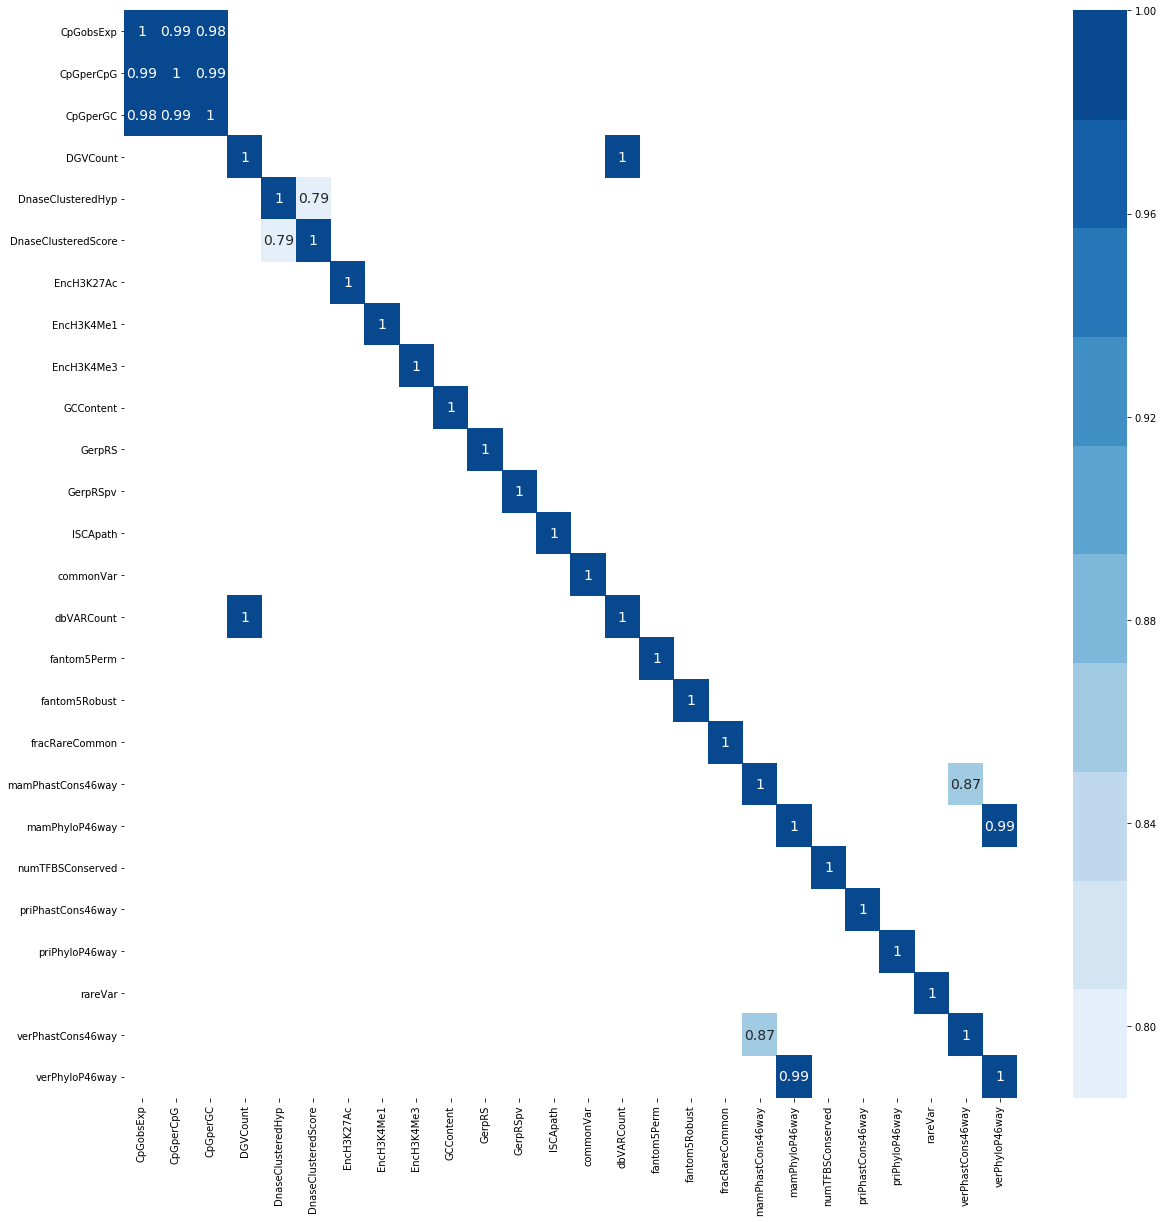

In [6]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,20))
corr_mat = train_X.corr("pearson").round(3)
corr_mat = corr_mat.applymap(lambda x: x if x > 0.75 else np.nan)
ax = sns.heatmap(corr_mat, annot=True, cmap=sns.color_palette("Blues", 10), annot_kws={"fontsize":14})

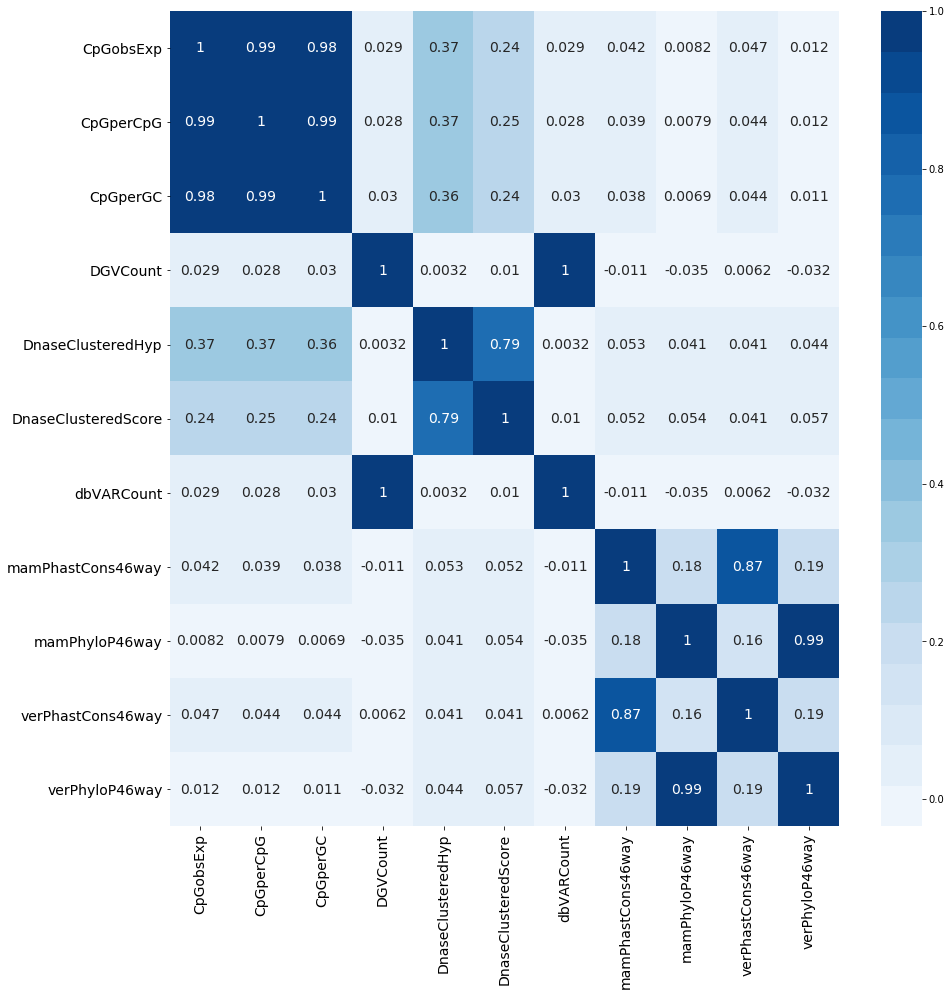

In [28]:
correlated_data = train_X[["CpGobsExp", "CpGperCpG", "CpGperGC", "DGVCount", "DnaseClusteredHyp", "DnaseClusteredScore", "dbVARCount", "mamPhastCons46way", "mamPhyloP46way", "verPhastCons46way", "verPhyloP46way"]]
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,15))
ax = sns.heatmap(correlated_data.corr("pearson"), annot=True, cmap=sns.color_palette("Blues", 20), annot_kws={"fontsize":14})
ax.tick_params(axis="both", labelsize=14)

In [31]:
relevant_columns = ["CpGobsExp", "CpGperCpG", "CpGperGC", "DGVCount", "DnaseClusteredHyp", "DnaseClusteredScore", "dbVARCount", "mamPhastCons46way", "mamPhyloP46way", "verPhastCons46way", "verPhyloP46way"]
p_vals = np.empty((len(relevant_columns), len(relevant_columns)))
for i, elem in enumerate(relevant_columns):
    for j, elem2 in enumerate(relevant_columns):
        _, p = pearsonr(train_X[elem], train_X[elem2])
        p_vals[i,j] = p


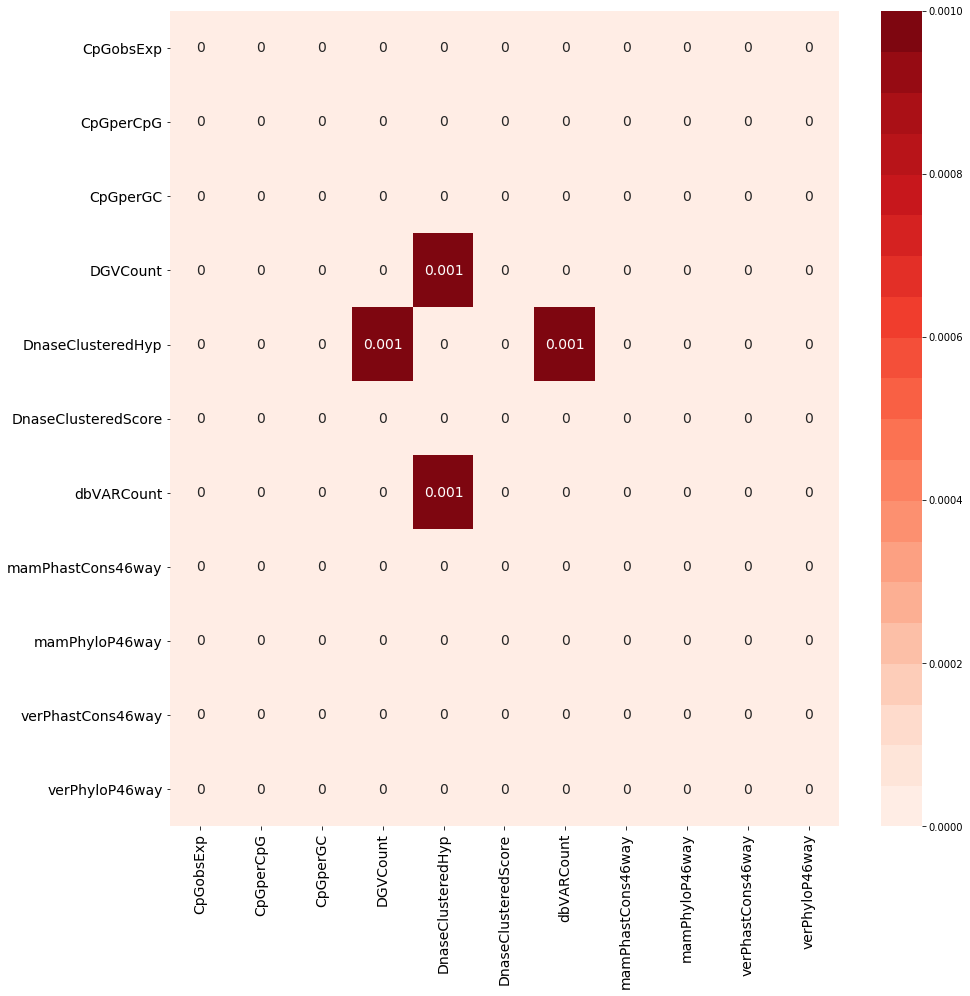

In [32]:
df = pd.DataFrame(data=p_vals, columns=relevant_columns, index=relevant_columns)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,15))
ax = sns.heatmap(df.round(3), annot=True, cmap=sns.color_palette("Reds", 20), annot_kws={"fontsize":14})
ax.tick_params(axis="both", labelsize=14)

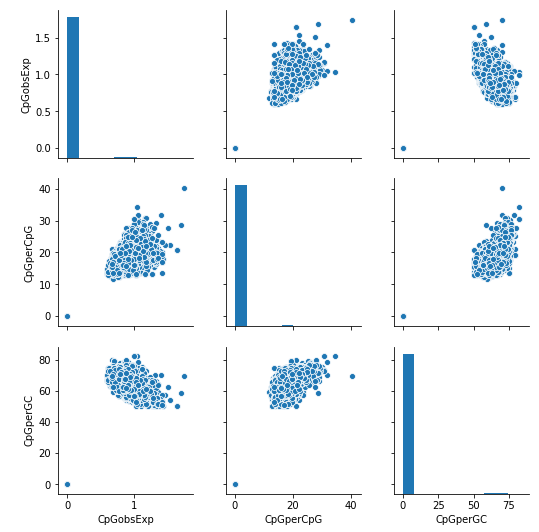

In [2]:
sns.pairplot(train_X[["CpGobsExp", "CpGperCpG", "CpGperGC"]])

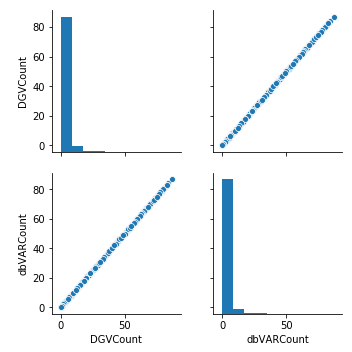

In [3]:
sns.pairplot(train_X[["DGVCount", "dbVARCount"]])

Text(0, 0.5, 'DnaseClusteredHyp')

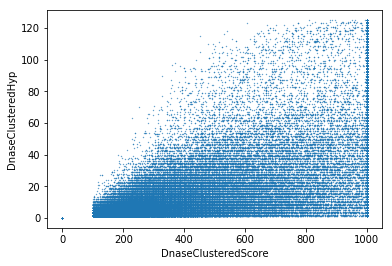

In [5]:
fig, (ax) = plt.subplots(1,1)
ax.scatter(train_X.DnaseClusteredScore, train_X.DnaseClusteredHyp, s =0.1)
ax.set_xlabel("DnaseClusteredScore")
ax.set_ylabel("DnaseClusteredHyp")

Text(0, 0.5, 'mamPhastCons46way')

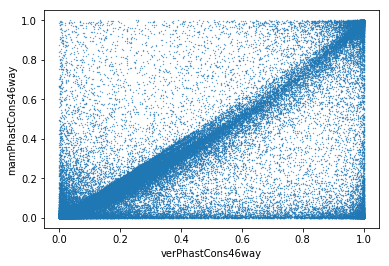

In [4]:
fig, (ax) = plt.subplots(1,1)
ax.scatter(train_X.verPhastCons46way, train_X.mamPhastCons46way, s =0.1)
ax.set_xlabel("verPhastCons46way")
ax.set_ylabel("mamPhastCons46way")

Text(0, 0.5, 'CpGperGC')

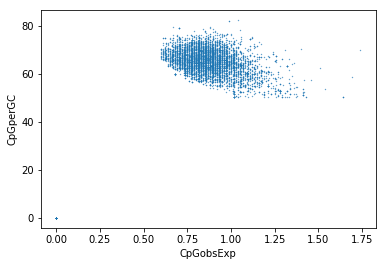

In [6]:
fig, (ax) = plt.subplots(1,1)
ax.scatter(train_X.CpGobsExp, train_X.CpGperGC, s =0.1)
ax.set_xlabel("CpGobsExp")
ax.set_ylabel("CpGperGC")


Text(0, 0.5, 'verPhyloP46way')

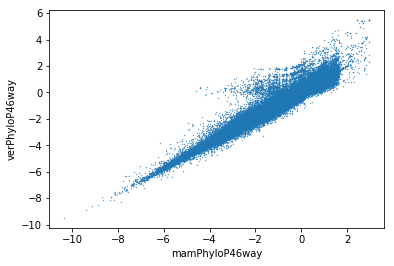

In [7]:
fig, (ax) = plt.subplots(1,1)
ax.scatter(train_X.mamPhyloP46way, train_X.verPhyloP46way, s =0.1)
ax.set_xlabel("mamPhyloP46way")
ax.set_ylabel("verPhyloP46way")

Text(0, 0.5, 'Percentage of zeros')

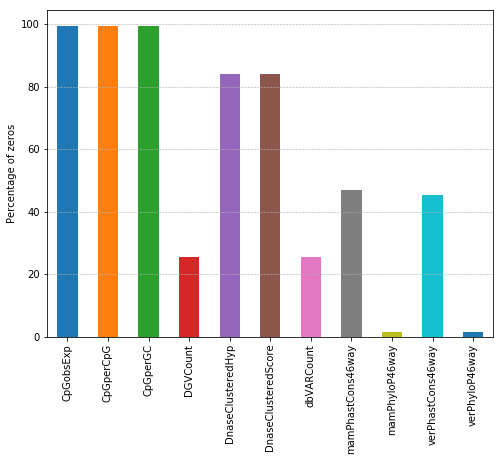

In [48]:
relevant_columns = ["CpGobsExp", "CpGperCpG", "CpGperGC", "DGVCount", "DnaseClusteredHyp", "DnaseClusteredScore", "dbVARCount", "mamPhastCons46way", "mamPhyloP46way", "verPhastCons46way", "verPhyloP46way"]
df = train_X[relevant_columns]
zero_counts =df.apply(lambda x: x.value_counts().loc[0.0])
zero_percs = (zero_counts / len(train_X))*100

ax = zero_percs.plot.bar(figsize=(8,6))
ax.grid(axis="y", linestyle="--", linewidth=0.6)
ax.set_ylabel("Percentage of zeros")